## <center>Tópicos III - PSO </center><br>
### <center>Encontrando um Mínimo Global na Função de Rastringin usando PSO</center>

Prof. Me. Carlos Igor Ramos Bandeira<br/>
João Vitor Chaves de Oliveira

### 1. Introdução

<p style="text-align: justify;">O método de Otimização por Enxame de Partículas (em inglês: Particle Swarm Optimization ou PSO) é um ramo da inteligência artificial também classificado por alguns autores como um ramo da computação evolucionária, que otimiza um problema iterativamente ao tentar melhorar a solução candidata com respeito a uma dada medida de qualidade.<br>
O PSO é inspirado pelo comportamento social e cooperativo exibido por várias espécies por forma a realizar as suas necessidades no espaço de pesquisa (“Search-space”). Alem disso, PSO é uma meta-heurística, pois realiza poucas ou nenhuma premissas sobre o problema que está a ser otimizado e pode procurar soluções candidatas em espaços de grandes dimensões. No entanto, algumas meta-heurísticas como PSO não garantem que uma solução ideal seja encontrada. Em termos gerais, o algoritmo guia-se por experiência pessoal (Pbest), experiência geral (Gbest) e o movimento da partícula atual para decidir as posições seguintes no espaço de pesquisa. <br>
O PSO resolve um problema criando uma população de soluções candidatas, também conhecidas como partículas, e movendo estas partículas em torno do espaço de pesquisa, de acordo com fórmulas matemáticas simples sobre a posição e velocidade da partícula. O movimento de cada partícula é influenciado pela sua posição do local mais conhecida, mas, também é guiado em direção às posições mais conhecidas do espaço de pesquisa, que são atualizadas como posições melhores quando encontradas por outras partículas. Isto é esperado, quando o intuito é mover o enxame na direção da melhor solução.<br>
Neste trabalho, usaremos o PSO para encontrar um mínimo local na função de Rastringin. A função de Rastrigin é uma função não-convexa usada como um problema de teste de desempenho para algoritmos de otimização. É um exemplo típico de função multimodal não-linear. Foi proposto pela primeira vez por Rastrigin como uma função bidimensional. Encontrar o mínimo desta função é um problema bastante difícil devido ao seu grande espaço de busca e ao grande número de mínimos locais.</p> </br> A função de Rastringin se configura da seguinte maneira:</p>

<b><center>$f(x_1,x_2) = 20 + x_{1}^2 + x_{2}^2 - 10[cos(2\pi x_1)+cos(2\pi x_2)]$, onde $x_i \in [-5.12;+5.12], i={1,2}$.<center></b> 
<p style="text-align: justify;">Esta função possui um mínimo global em $(x_1,x_2)= (0,0)$, para o qual $f(x_1,x_2)=0$.<br>
Antes de começarmos a busca por um mínimo global nesta função usando PSO, é essencial estarmos familiarizados com algumas terminologias básicas que serão usadas ao longo deste trabalho e apresentadas na Seção seguinte.</p>


### 2. Fundamentação Teórica

Nesta Seção, apresentaremos algumas definições importantes ao entendimento deste trabalho.<br>

<b>2.1. Topologia</b><br> 
<p style="text-align: justify;">Existem duas formas básicas de organizar a população. Essas formas são conhecidas como topologia do algoritmo e são elas: topologia global e topologia local. 
</p>

<b>2.2. Topologia global</b><br>
<p style="text-align: justify;">Na topologia global, todas as partículas possuem informações sobre todas as outras demais. Já na topologia local, uma partícula só possui informações de sua vizinha esquerda e direita. A escolha da topologia pode evitar que o algoritmo caia em mínimos locais.
</p>

<p style="text-align: justify;">
Bom, sabemos que o PSO busca a solução ótima alterando as trajetórias dos indivíduos de sua população. Para fazer isso o algoritmo atualiza a velocidade e a posição de cada partícula. Considere uma população com $K$ partículas. As variáveis $v_k$ e $x_k$ serão a velocidade e posição da particula $k$ , respectivamente. A velocidade e posição de cada partícula, deve ser atualizada de acordo com as equações:<br>
<center>$v_{k+1} = wv_k + c_1r_1(p_{best_{k}} - x_k) + c_2r_2(g_{best}-x_k)$ </center><br>
<center>$x_{k+1} = x_k + v_k$, onde:</center><br>
$w$: coeficiente de inércia.<br>
$p_{best_{k}}$: melhor posição conhecida da partícula $k$.<br>
$g_{best}$: melhor posição conhecida dentre todas as partículas.<br>
$c_1$ e $c_2$ : constantes de aceleração referentes ao melhor individual e global, respectivamente.<br>
$r_1$ e $r_2$: números aleatórios extraídos do intervalo [0,1].<br>
</p>

<p style="text-align: justify;">Na Seção seguinte, mostraremos passo-a-passo da construção do algoritmo PSO para a função de Rastrigin.

### 3. Metodologia

Nesta Seção, mostraremos os passos algorítmicos para se encontrar os resultados desejados.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.seterr(all='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
def Rastringin(X,Y):
        return ( 20+(np.power(X,2)+np.power(Y,2))-(10*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y)) ) )

In [3]:
class Particle:
    def __init__(self, x1,x2):
        self.x1 = x1
        self.x2 = x2
        self.fitness = 0
        self.velocidade = [0,0]
        
    def __lt__(self, other):
        return (self.fitness < other.fitness)

    def __eq__(self, other):
        return (self.fitness == other.fitness)

    def __gt__(self, other):
        return(self.fitness > other.fitness)

    def __le__(self, other):
        return(self.fitness <= other.fitness)

    def __cmp__(self, other):
        if self.fitness < other.fitness:
            return -1
        elif self.fitness > other.fitness:
            return 1
        else:
            return 0
    
    def __sub__(self, other):
        return Particle(self.x1 - other.x1, self.x2 - other.x2)
    
    def __add__(self,other):
        return Particle(self.x1 + other.x1, self.x2+other.x2)

    def __mul__(self,other):
        if(type(other)==float or type(other)==int):
            return Particle(self.x1 * other , self.x2*other)
        return Particle(self.x1*other.x1, self.x2*other.x2)
        
    def __repr__(self) :
        return '({},{})'.format(self.x1,self.x2)

    def printSolution(self) :
        return self.__repr__()
                

In [4]:
class PSO:
    def __init__(self, pop_size = 30, inercia = 0.8, c1 = 0.3, c2 = 0.3, w = 0.5, n_iteracoes = 150):
        self.popsize = pop_size
        self.poplist = []
        self.c1 = c1
        self.c2 = c2
        self.w = w
        self.n_iteracoes = n_iteracoes
        self.inercia = inercia
        
    def makeInitialPopulation(self) :    
        for j in range(self.popsize):
            self.poplist.append(Particle(random.uniform(-5.12,5.12),random.uniform(-5.12,5.12)))
            
    
    def assignFitness(self) :
        for particle in self.poplist:
                fit = Rastringin(particle.x1, particle.x2)
                particle.fitness = fit
    
    def atualizaVelocidade(self):
        self.poplist.sort()
        pbest = self.poplist[0]
        gbest = self.poplist[1]
        
        
        for particle in self.poplist:
            flag = True
            while(flag):
                wv = []
                wv.append(particle.velocidade[0]*self.inercia)
                wv.append(particle.velocidade[1]*self.inercia)
                
                subp = (pbest - particle) * (self.c1 * random.random())
                subg = (gbest - particle) * (self.c2 * random.random())  #random.random()

                wv[0] = wv[0] + subp.x1 + subg.x1
                wv[1] = wv[1] + subp.x2 + subg.x2

                if ((wv[0] <= 0.3 or wv[0] >= -0.3) and (wv[1] <= 0.3 or wv[1] >= -0.3)):
                    particle.velocidade[0] = wv[0]
                    particle.velocidade[1] = wv[1]
                    flag = False                
                
    def atualizaPosicao(self):
        
        for particle in self.poplist:
            x = particle.x1 + particle.velocidade[0]
            y = particle.x2 + particle.velocidade[1]
            new_pos = Rastringin(x,y)
            if(particle.fitness > new_pos):
                particle.x1 = x
                particle.x2 = y                
    
    
    def runPSO(self):
        melhoresResultados = []
        self.makeInitialPopulation()
        for i in range(1, self.n_iteracoes+1):
            ### Gera o fitness de cada elemento da populacao
            self.assignFitness()
            
            ### Encontra a melhor solucao da geracao atual
            best = min(self.poplist)
            melhoresResultados.append(best.fitness)
            
            #print ('Melhor solucao atual: ', best.printSolution() ,", Fitness: " ,str(best.fitness))
            
            self.atualizaVelocidade()
            self.atualizaPosicao()
            
            
            
        ### Apresenta a melhor solucao final
        self.assignFitness()
        best = min(self.poplist)
        print ('Melhor solucao: ', best.printSolution() ,", Fitness: " ,str(best.fitness))
        return melhoresResultados
        

In [5]:

pso = PSO()
resultados = pso.runPSO()

Melhor solucao:  (-3.741347887929083e-09,-9.389879777531397e-09) , Fitness:  2.13162820728e-14


### 4. Resultados

In [6]:
def plotar(X):
    plt.plot(X)
    plt.title("Gráfico da função de aptidão do melhor individuo")
    plt.grid(True)
    plt.xlabel("Iterações")
    plt.ylabel("Fitness/Aptidão")
    plt.show()

<b>4.1. Variando o tamanho da população</b> <br>

Melhor solucao:  (1.61185824990769e-07,-1.5517668450813764e-07) , Fitness:  9.92983473225e-12


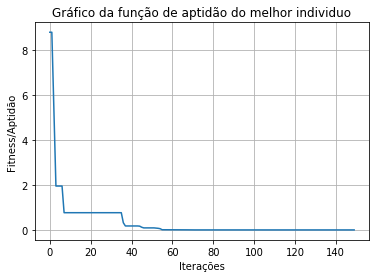

In [52]:
pso = PSO(pop_size=20)
resultados = pso.runPSO()
plotar(resultados)

Melhor solucao:  (-1.9612206257078923e-08,-9.955494653242586e-09) , Fitness:  9.59232693276e-14


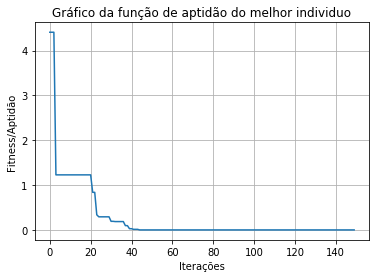

In [47]:
pso = PSO(pop_size=50)
resultados = pso.runPSO()
plotar(resultados)

Melhor solucao:  (-1.083602254130795e-09,2.470641410566869e-09) , Fitness:  0.0


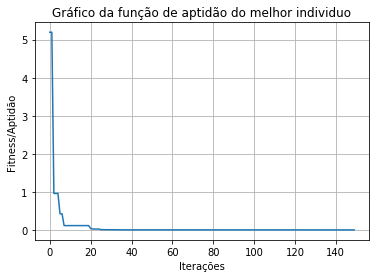

In [49]:
pso = PSO(pop_size=70)
resultados = pso.runPSO()
plotar(resultados)

Melhor solucao:  (-1.08696207169789e-09,0.9949586373590479) , Fitness:  0.994959057093


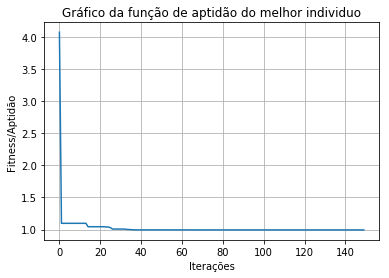

In [50]:
pso = PSO(pop_size=100)
resultados = pso.runPSO()
plotar(resultados)

<b>4.2. Variando a inércia</b> <br>

Melhor solucao:  (-0.0022058490065236256,0.00218269334124901) , Fitness:  0.00191046983443


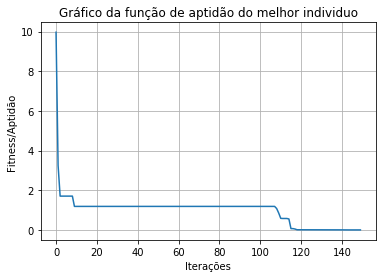

In [63]:
pso = PSO(inercia=0.3)
resultados = pso.runPSO()
plotar(resultados)

Melhor solucao:  (-2.872135882811744e-09,-8.450573347644278e-11) , Fitness:  0.0


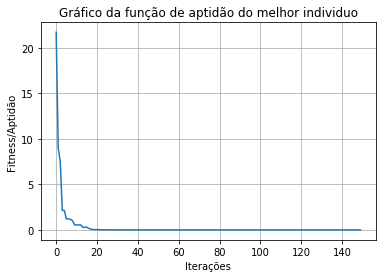

In [64]:
pso = PSO(inercia=0.5)
resultados = pso.runPSO()
plotar(resultados)

Melhor solucao:  (-2.221371745580092e-09,-3.063746856904034e-08) , Fitness:  1.84741111298e-13


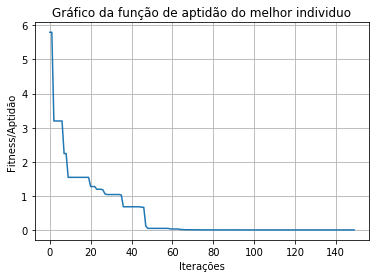

In [65]:
pso = PSO(inercia=0.8)
resultados = pso.runPSO()
plotar(resultados)

Melhor solucao:  (8.623434676232402e-06,-1.2741689434894623e-06) , Fitness:  1.50752441641e-08


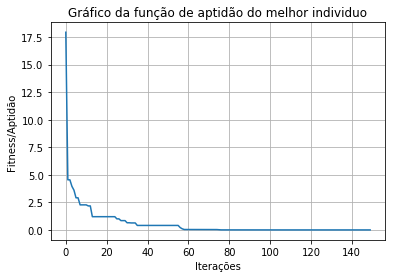

In [66]:
pso = PSO(inercia=0.9)
resultados = pso.runPSO()
plotar(resultados)

<b>4.3. Variando $c_1$ e $c_2$</b> <br>

Melhor solucao:  (2.716843812659839e-09,4.321707206795058e-09) , Fitness:  3.5527136788e-15


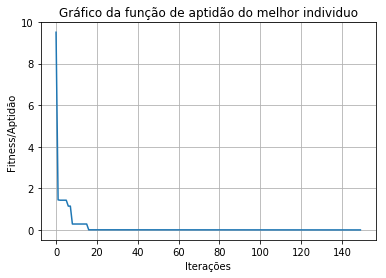

In [27]:
pso = PSO(c1 = 0.3, c2 = 0.3)
resultados = pso.runPSO()
plotar(resultados)

Melhor solucao:  (-2.4016625574303306e-08,-2.117294631456824e-08) , Fitness:  2.0605739337e-13


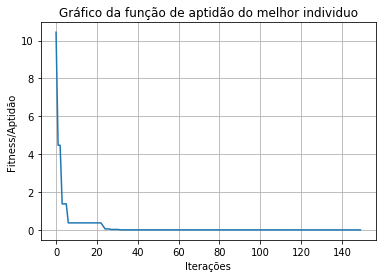

In [67]:
pso = PSO(c1 = 0.5, c2 = 0.5)
resultados = pso.runPSO()
plotar(resultados)

Melhor solucao:  (0.0026313729607930305,-0.003443873183330458) , Fitness:  0.00372655111278


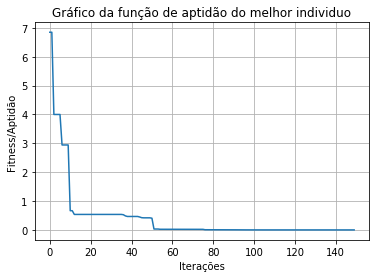

In [29]:
pso = PSO(c1 = 0.7, c2 = 0.7)
resultados = pso.runPSO()
plotar(resultados)

Melhor solucao:  (-5.8134410254575045e-05,-0.9951444933374809) , Fitness:  0.99496657717


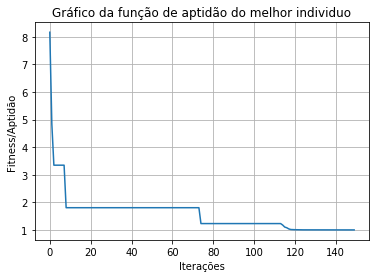

In [30]:
pso = PSO(c1 = 0.9, c2 = 0.9)
resultados = pso.runPSO()
plotar(resultados)

### 5. Conclusão

Segundo Eberhart e Shi (2011), a grande vantagen de utilizar o PSO é a sua fácil implementação, usando somente estruturas primitivas e operadores matemáticos sem grande custo computacional. Obviamente, como toda heurística, o PSO não garante a solução ótima e é comum o método cair em mínimos locais. Entretanto, neste trabalho conseguimos obter soluções muitos próximas da ótima ou de fato a ótima.

Nos testes feitos na Seção anterior, concluimos que:<br>
* Variando o tamanho da população, não se pode chegar a uma conclusão uma vez que a convergência para a solução alternava de acordo com o tamanho da população. Ou seja, quando a população aumentava, ora soluções foram melhores, ora piores.<br>
* Variando a inércia conclui-se que os melhores valores soluções foram obtidos dentro de um intervalo entre $[0.5,0.8]$.<br>
* Variando $c_1$ e $c_2$ conclui-se que para valores menores, o algorítmo converge para uma solução mais rapidamente. Em valores maiores observa-se que muitas vezes não se chega em um solução tão boa que são as s.<br>

Vale ressaltar que os resultados obtidos nestes testes usaram parâmetros fixados. Caso outros parâmetros fixos sejam usados como teste, não é garantido que as mesmas conclusões sejam tomadas.

### 6. Referências

Código disponível no github no seguinte link: https://github.com/jvitorc17/topicosIA/blob/master/trabalho-algoritmos-geneticos-rastringin.ipynb

Engelbrecht, A. P. (2007). Computational intelligence: an introduction. John Wiley &
Sons.
Site Computação Inteligente: http://www.computacaointeligente.com.br/algoritmos/otimizacao-por-enxame-de-particulas-pso/

Wikipedia: https://pt.wikipedia.org/wiki/Optimiza%C3%A7%C3%A3o_por_enxame_de_part%C3%ADculas#cite_note-3

Particle Swarm Optimization: Basic Concepts, Variants and Applications in Power Systems: https://www.researchgate.net/publication/3419028_Particle_Swarm_Optimization_Basic_Concepts_Variants_and_Applications_in_Power_Systems
